In [1]:
import pandas as pd
df = pd.read_excel('data_10k.xlsx')
df

,ACC_CHET_UL_FLG,OPEN_CHET_UL_CNT,HIGH_RISK_FLG,UL_UKL_FLG,ACC_OBJ_CNT,ACC_OBJ_CNT.1,ACC_LAND_CNT,ACC_TRANS_CNT,ACC_AIR_CNT,ACC_OTHER_TRANS_CNT,...,UCHR_UCHR_REG_CHANGE_CNT,REGION_INEQ_UL_RUK_FLG,REGION_INEQ_UL_UCH_FLG,NO_OTCHET_FLG,BLOCKED_SCHET_UL_FLG,BLOCKED_SCHET_UL_CNT,SINGLE_RUK_UCH_FL_FLG,SINGLE_RUK_UCH_UL_FLG,RUK_PROVIDE_2NDFL_FLG,P_NED_ADR
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,1,0,0,2,2,0,0,0,0,...,0,0,0,0,1,48,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0
3,1,9,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,1,0,0,0
4,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,7,0,0,0,0,0,4,0,0,...,0,1,1,0,0,0,0,0,1,0
9996,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,0,0,0,0
9997,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
9998,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
binary_cols =  [f for f in list(df.columns) if 'FLG' in f]
binary_cols

['ACC_CHET_UL_FLG',
 'HIGH_RISK_FLG',
 'UL_UKL_FLG',
 'REGION_INEQ_UL_RUK_FLG',
 'REGION_INEQ_UL_UCH_FLG',
 'NO_OTCHET_FLG',
 'BLOCKED_SCHET_UL_FLG',
 'SINGLE_RUK_UCH_FL_FLG',
 'SINGLE_RUK_UCH_UL_FLG',
 'RUK_PROVIDE_2NDFL_FLG']

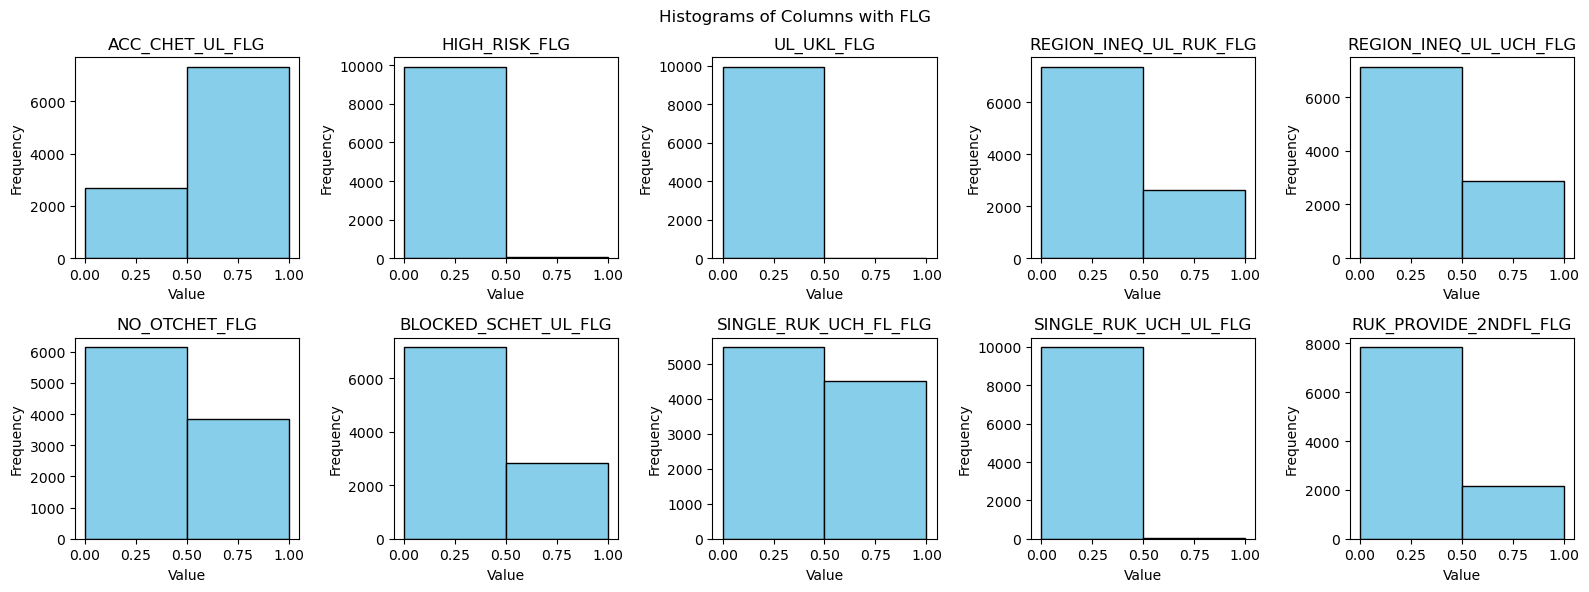

In [11]:
import matplotlib.pyplot as plt

# Assuming df is already loaded and binary_cols is defined as per your description
binary_cols = [f for f in list(df.columns) if 'FLG' in f]

# Create a 2x5 subplot layout for histograms
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 6))
fig.suptitle('Histograms of Columns with FLG')

# Flatten axes to iterate over them easily
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(binary_cols):
    ax = axes[i]
    ax.hist(df[col], bins=2, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Add space for the title
plt.show()


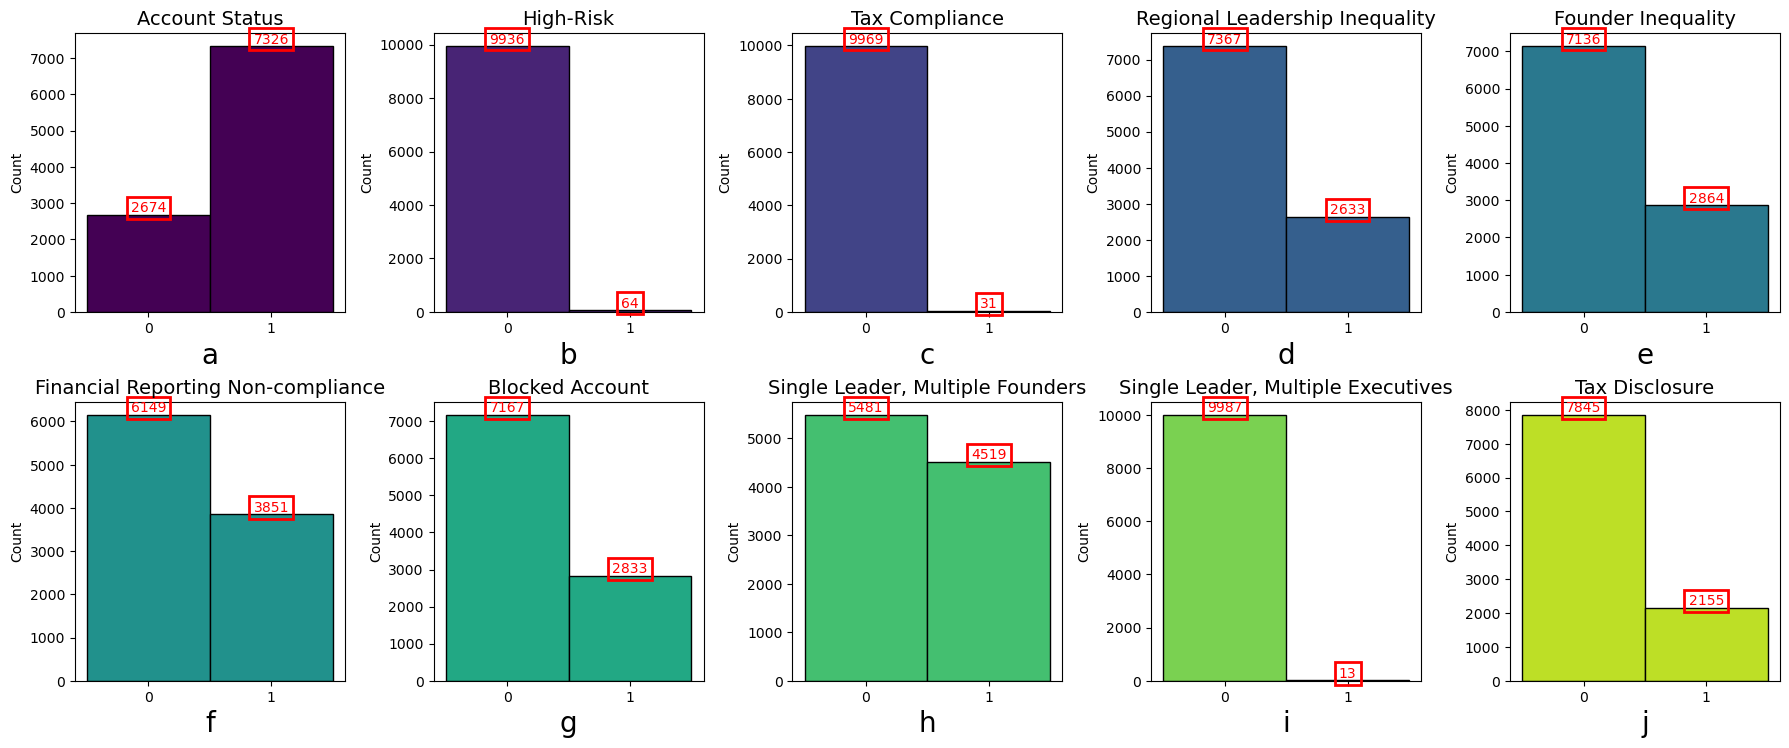

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm  # Import colormap module

# Assuming df is already loaded and binary_cols is defined as per your description
binary_cols = [f for f in list(df.columns) if 'FLG' in f]

labels = [
    "Account Status",
    "High-Risk",
    "Tax Compliance",
    "Regional Leadership Inequality",
    "Founder Inequality",
    "Financial Reporting Non-compliance",
    "Blocked Account",
    "Single Leader, Multiple Founders",
    "Single Leader, Multiple Executives",
    "Tax Disclosure"
]

letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


# Create a 2x5 subplot layout for histograms
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))
#fig.suptitle('Histograms of Columns with FLG')

# Flatten axes to iterate over them easily
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(binary_cols):
    ax = axes[i]
    values = df[col].values
    
    # Plot histogram with Viridis colormap
    counts, bins, _ = ax.hist(values, bins=2, color=cm.viridis(i / len(binary_cols)), edgecolor='black')  # Use cm.viridis for colormap
    ax.set_title(labels[i], fontsize=14)
    ax.set_xlabel(fr'{letters[i]}', fontsize=20)
    ax.set_ylabel('Count')
    
    # Set xticks at the centers of left and right bars
    ax.set_xticks([0.25, 0.75])
    ax.set_xticklabels(['0', '1'])
    
    # Add bbox for each bin
    for j, count in enumerate(counts):
        bbox_props = dict(boxstyle="square,pad=0.3", fc="none", ec="red", lw=2)
        if j < len(bins) - 1:
            ax.text((bins[j] + bins[j+1]) / 2, count, f'{count:.0f}', ha="center", va="bottom", color="red", bbox=bbox_props)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Add space for the title
plt.savefig('flg_hists.pdf')
plt.show()


